In [5]:
import tensorflow as tf
import numpy as np

In [7]:
# 텐서플로 선형 분류기
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [8]:
inputs = np.vstack( (negative_samples, positive_samples)).astype('float32')

In [18]:
targets = np.vstack((
    np.zeros((num_samples_per_class,1),dtype='float32' ),
    np.ones((num_samples_per_class,1),dtype='float32' )
))

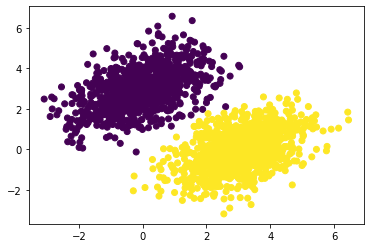

In [11]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c= target[:,0])
plt.show()

In [13]:
# 선형분류기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [14]:
# 정방향
def model(input):
    return tf.matmul(inputs,W)+b

In [15]:
# 평균제곱 손실오차
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [16]:
# 훈련스텝 함수
learning_rate = 0.1
def traning_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrd_W, grad_loss_wrt_b =tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrd_W*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

In [19]:
# 배치단위로 훈련
for step in range(40):
    loss = traning_step(inputs, targets)
    print(f"{step}번째 스텝의 손실:{loss:.4f}")

0번째 스텝의 손실:4.7725
1번째 스텝의 손실:0.6672
2번째 스텝의 손실:0.2094
3번째 스텝의 손실:0.1497
4번째 스텝의 손실:0.1343
5번째 스텝의 손실:0.1244
6번째 스텝의 손실:0.1158
7번째 스텝의 손실:0.1081
8번째 스텝의 손실:0.1010
9번째 스텝의 손실:0.0945
10번째 스텝의 손실:0.0885
11번째 스텝의 손실:0.0831
12번째 스텝의 손실:0.0782
13번째 스텝의 손실:0.0736
14번째 스텝의 손실:0.0695
15번째 스텝의 손실:0.0657
16번째 스텝의 손실:0.0622
17번째 스텝의 손실:0.0591
18번째 스텝의 손실:0.0562
19번째 스텝의 손실:0.0536
20번째 스텝의 손실:0.0511
21번째 스텝의 손실:0.0489
22번째 스텝의 손실:0.0469
23번째 스텝의 손실:0.0451
24번째 스텝의 손실:0.0434
25번째 스텝의 손실:0.0419
26번째 스텝의 손실:0.0404
27번째 스텝의 손실:0.0392
28번째 스텝의 손실:0.0380
29번째 스텝의 손실:0.0369
30번째 스텝의 손실:0.0359
31번째 스텝의 손실:0.0350
32번째 스텝의 손실:0.0342
33번째 스텝의 손실:0.0335
34번째 스텝의 손실:0.0328
35번째 스텝의 손실:0.0322
36번째 스텝의 손실:0.0316
37번째 스텝의 손실:0.0311
38번째 스텝의 손실:0.0306
39번째 스텝의 손실:0.0301


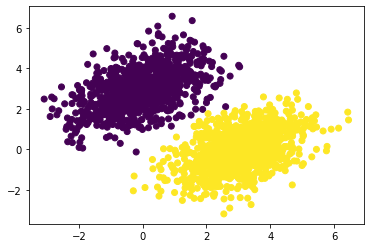

In [20]:
plt.scatter(inputs[:,0],inputs[:,1], c= target[:,0] > 0.5)  
plt.show()

In [21]:
x = np.linspace(-1,4,100)

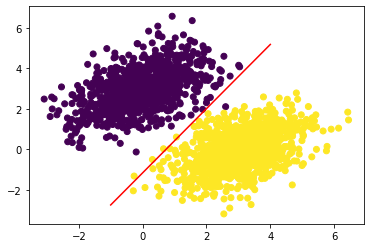

In [23]:
# [-1, 4]
y = -W[0] / W[1] * x + (0.5-b) / W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0],inputs[:,1], c= target[:,0] > 0.5)  
plt.show()

In [24]:
from tensorflow import keras

In [28]:
class SimpleDense(keras.layers.Layer):
    def __init__(self,units,activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),initializer='random_normal' )
        self.b = self.add_weight(shape=(self.units,),initializer='zeros')
    def call(self, inputs):
        y = tf.matmul(inputs,self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [29]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
output_tensor.shape

TensorShape([2, 32])

In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dense(32)
])

In [32]:
model = models.Sequential([
    SimpleDense(32,activation='relu'),
    SimpleDense(64,activation='relu'),
    SimpleDense(32,activation='relu'),
    SimpleDense(10,activation='relu')
])

In [33]:
# 학습과정 설계
model = keras.Sequential(
    [
        keras.layers.Dense(1)
    ]
)
model.compile(optimizer = 'adam',loss='mse',metrics=['acc'])

In [36]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [37]:
hist = model.fit(
    inputs,targets,epochs=5,batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 18.7923 - binary_accuracy: 0.0025
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 18.3433 - binary_accuracy: 0.0025
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 17.9023 - binary_accuracy: 0.0025
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 17.4665 - binary_accuracy: 0.0025
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 17.0459 - binary_accuracy: 0.0025


In [38]:
hist.history

{'loss': [18.792274475097656,
  18.343273162841797,
  17.90226936340332,
  17.466468811035156,
  17.045867919921875],
 'binary_accuracy': [0.0024999999441206455,
  0.0024999999441206455,
  0.0024999999441206455,
  0.0024999999441206455,
  0.0024999999441206455]}